In [1]:
import pandas as pd

In [2]:
beer_df = pd.read_csv('./data/beer.csv')

In [3]:
beer_df

name  calories  sodium  alcohol  cost
0              Budweiser       144      15      4.7  0.43
1                Schlitz       151      19      4.9  0.43
2              Lowenbrau       157      15      0.9  0.48
3            Kronenbourg       170       7      5.2  0.73
4               Heineken       152      11      5.0  0.77
5          Old_Milwaukee       145      23      4.6  0.28
6             Augsberger       175      24      5.5  0.40
7   Srohs_Bohemian_Style       149      27      4.7  0.42
8            Miller_Lite        99      10      4.3  0.43
9        Budweiser_Light       113       8      3.7  0.40
10                 Coors       140      18      4.6  0.44
11           Coors_Light       102      15      4.1  0.46
12        Michelob_Light       135      11      4.2  0.50
13                 Becks       150      19      4.7  0.76
14                 Kirin       149       6      5.0  0.79
15     Pabst_Extra_Light        68      15      2.3  0.38
16                 Hamms       139      19      4.4  0.43
17   Heilemans_Old_Style       144      24      4.9  0.43
18   Olympia_Goled_Light        72       6      2.9  0.46
19         Schlitz_Light        97       7      4.2  0.47

### Normalizing the features

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [32]:
scaler = StandardScaler()

In [33]:
X_scaled_df = scaler.fit_transform(beer_df[['calories',
                                            'sodium',
                                            'alcohol',
                                            'cost']])

/Users/manaranjan/anaconda/envs/py37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/manaranjan/anaconda/envs/py37/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [34]:
X_scaled_df

array([[ 0.42839039,  0.00799719,  0.37792744, -0.4506559 ],
       [ 0.66382808,  0.61578328,  0.64387639, -0.4506559 ],
       [ 1.30287324, -1.20757501,  1.0427998 ,  1.62090751],
       [ 0.69746203, -0.59978891,  0.77685086,  1.89711597],
       [ 0.46202434,  1.22356938,  0.24495297, -1.48643761],
       [ 1.47104302,  1.3755159 ,  1.44172322, -0.65781224],
       [ 0.59656016,  1.83135548,  0.37792744, -0.51970801],
       [-1.08513763, -0.75173544, -0.15397044, -0.4506559 ],
       [-0.61426225, -1.05562848, -0.95181727, -0.65781224],
       [ 0.29385456,  0.46383676,  0.24495297, -0.38160379],
       [-0.98423576,  0.00799719, -0.41991938, -0.24349956],
       [ 0.12568478, -0.59978891, -0.28694491,  0.0327089 ],
       [ 0.63019412,  0.61578328,  0.37792744,  1.82806386],
       [ 0.59656016, -1.35952153,  0.77685086,  2.0352202 ],
       [-2.12779026,  0.00799719, -2.81345987, -0.79591647],
       [ 0.26022061,  0.61578328, -0.02099597, -0.4506559 ],
       [ 0.42839039,  1.

In [35]:
import matplotlib.pyplot as plt
import seaborn as sn

In [36]:
sn.clustermap?

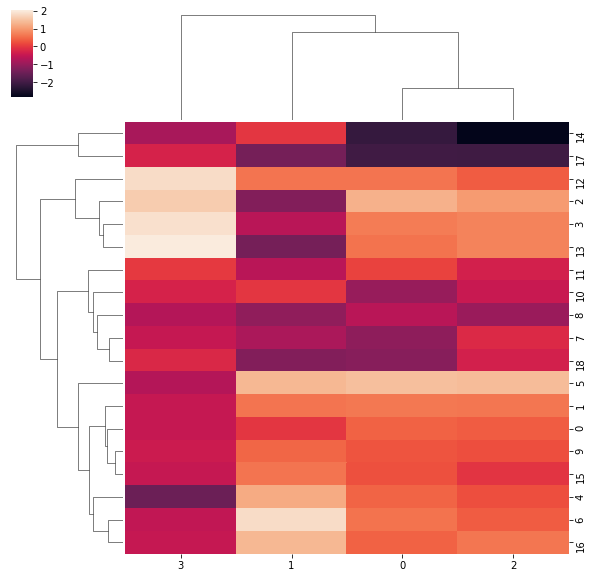

In [37]:
sn.clustermap(X_scaled_df);

### Creating clusters

In [38]:
from sklearn.cluster import KMeans

In [39]:
kmeans = KMeans(6, random_state = 100)

In [40]:
kmeans.fit(X_scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [41]:
kmeans.labels_

array([1, 1, 2, 2, 5, 5, 5, 3, 3, 1, 3, 3, 4, 2, 0, 1, 5, 0, 3],
      dtype=int32)

In [42]:
beer_df['cluster'] = kmeans.labels_

In [43]:
beer_df

name  calories  sodium  alcohol  cost  cluster
0              Budweiser       144      15      4.7  0.43        1
1                Schlitz       151      19      4.9  0.43        1
3            Kronenbourg       170       7      5.2  0.73        2
4               Heineken       152      11      5.0  0.77        2
5          Old_Milwaukee       145      23      4.6  0.28        5
6             Augsberger       175      24      5.5  0.40        5
7   Srohs_Bohemian_Style       149      27      4.7  0.42        5
8            Miller_Lite        99      10      4.3  0.43        3
9        Budweiser_Light       113       8      3.7  0.40        3
10                 Coors       140      18      4.6  0.44        1
11           Coors_Light       102      15      4.1  0.46        3
12        Michelob_Light       135      11      4.2  0.50        3
13                 Becks       150      19      4.7  0.76        4
14                 Kirin       149       6      5.0  0.79        2
15     Pabst_Extra_Light        68      15      2.3  0.38        0
16                 Hamms       139      19      4.4  0.43        1
17   Heilemans_Old_Style       144      24      4.9  0.43        5
18   Olympia_Goled_Light        72       6      2.9  0.46        0
19         Schlitz_Light        97       7      4.2  0.47        3

In [44]:
beer_df.sort_values('cluster')

name  calories  sodium  alcohol  cost  cluster
15     Pabst_Extra_Light        68      15      2.3  0.38        0
18   Olympia_Goled_Light        72       6      2.9  0.46        0
0              Budweiser       144      15      4.7  0.43        1
16                 Hamms       139      19      4.4  0.43        1
10                 Coors       140      18      4.6  0.44        1
1                Schlitz       151      19      4.9  0.43        1
4               Heineken       152      11      5.0  0.77        2
14                 Kirin       149       6      5.0  0.79        2
3            Kronenbourg       170       7      5.2  0.73        2
8            Miller_Lite        99      10      4.3  0.43        3
9        Budweiser_Light       113       8      3.7  0.40        3
11           Coors_Light       102      15      4.1  0.46        3
12        Michelob_Light       135      11      4.2  0.50        3
19         Schlitz_Light        97       7      4.2  0.47        3
13                 Becks       150      19      4.7  0.76        4
6             Augsberger       175      24      5.5  0.40        5
7   Srohs_Bohemian_Style       149      27      4.7  0.42        5
17   Heilemans_Old_Style       144      24      4.9  0.43        5
5          Old_Milwaukee       145      23      4.6  0.28        5

In [30]:
beer_df = beer_df.drop(2, axis = 0)

In [31]:
beer_df

name  calories  sodium  alcohol  cost  cluster
0              Budweiser       144      15      4.7  0.43        4
1                Schlitz       151      19      4.9  0.43        4
3            Kronenbourg       170       7      5.2  0.73        3
4               Heineken       152      11      5.0  0.77        3
5          Old_Milwaukee       145      23      4.6  0.28        1
6             Augsberger       175      24      5.5  0.40        1
7   Srohs_Bohemian_Style       149      27      4.7  0.42        1
8            Miller_Lite        99      10      4.3  0.43        0
9        Budweiser_Light       113       8      3.7  0.40        0
10                 Coors       140      18      4.6  0.44        4
11           Coors_Light       102      15      4.1  0.46        0
12        Michelob_Light       135      11      4.2  0.50        4
13                 Becks       150      19      4.7  0.76        3
14                 Kirin       149       6      5.0  0.79        3
15     Pabst_Extra_Light        68      15      2.3  0.38        5
16                 Hamms       139      19      4.4  0.43        4
17   Heilemans_Old_Style       144      24      4.9  0.43        1
18   Olympia_Goled_Light        72       6      2.9  0.46        5
19         Schlitz_Light        97       7      4.2  0.47        0